# Bonus: Temperature Analysis I

In [638]:
import pandas as pd
from datetime import datetime as dt
from scipy import stats
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

In [639]:
# "tobs" is "temperature observations"
df = pd.read_csv('hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [640]:
# Convert the date column format from string to datetime
df['date'] = pd.to_datetime(df['date'])
df

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71
19546,USC00516128,2017-08-20,NaN,78
19547,USC00516128,2017-08-21,0.56,76
19548,USC00516128,2017-08-22,0.50,76


In [641]:
# Set the date column as the DataFrame index
df.set_index('date')

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


In [642]:
# Drop the date column
df.reset_index()
df.drop(columns=['date'])

,station,prcp,tobs
0,USC00519397,0.08,65
1,USC00519397,0.00,63
2,USC00519397,0.00,74
3,USC00519397,0.00,76
4,USC00519397,NaN,73
...,...,...,...
19545,USC00516128,0.09,71
19546,USC00516128,NaN,78
19547,USC00516128,0.56,76
19548,USC00516128,0.50,76


### Compare June and December data across all years 

In [643]:
from scipy import stats

### Filter data for desired months

In [644]:
jun = new_df.loc[df['date'].dt.month == 6]
dec = new_df.loc[df['date'].dt.month == 12]

### Identify the average temperature in June at all stations across all available years in the dataset

In [645]:
jun_avg = jun.groupby(['station']).mean()
jun_avg

,prcp,tobs
station,,
USC00511918,0.015157,74.139394
USC00513117,0.118248,74.050847
USC00514830,0.114192,76.005376
USC00516128,0.495748,71.937220
USC00517948,0.057975,76.655405
USC00518838,0.094615,73.394737
USC00519281,0.151525,73.271186
USC00519397,0.022661,77.559322
USC00519523,0.050044,76.668103


### Identify the average temperature in December at all stations across all available years in the dataset

In [646]:
dec_avg = dec.groupby(['station']).mean()
dec_avg

,prcp,tobs
station,,
USC00511918,0.138146,69.684211
USC00513117,0.203241,71.069444
USC00514830,0.154966,73.224719
USC00516128,0.507005,69.291262
USC00517948,0.152727,71.834862
USC00518838,0.638182,72.421053
USC00519281,0.244931,69.903226
USC00519397,0.075314,71.109524
USC00519523,0.162010,72.433333


### Create collections of temperature data

In [647]:
jun_df = jun_avg.rename(columns={'tobs': 'june tobs'}).drop(columns='prcp')
dec_df = dec_avg.rename(columns={'tobs': 'december tobs'}).drop(columns='prcp')
combined = jun_df.join(dec_df, how='left')
combined

,june tobs,december tobs
station,,
USC00511918,74.139394,69.684211
USC00513117,74.050847,71.069444
USC00514830,76.005376,73.224719
USC00516128,71.937220,69.291262
USC00517948,76.655405,71.834862
USC00518838,73.394737,72.421053
USC00519281,73.271186,69.903226
USC00519397,77.559322,71.109524
USC00519523,76.668103,72.433333


### Run paired t-test

In [650]:
stats.ttest_rel(combined['june tobs'], combined['december tobs'])

Ttest_relResult(statistic=6.95696617044294, pvalue=0.00011759380231523222)

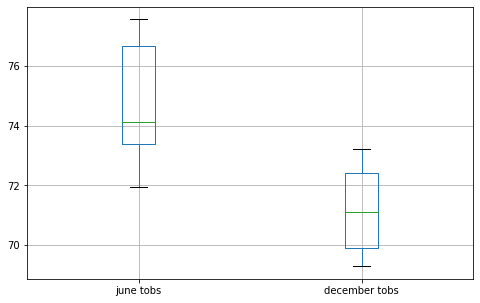

In [653]:
boxplot = combined.boxplot(column=['june tobs', 'december tobs'], figsize=(8,5))

### Analysis

Comparing all the average temperature from all stations, data shows that temperature on December drops comparing to average temeprature during month of June.